In [1]:
from grpc.beta import implementations
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from capt_gen import capt_gen, capt_decode

In [2]:
batch_size = 128
capt = capt_gen(batch_size)


host = '192.168.56.111' #'127.0.0.1'
port = '9000'
channel = implementations.insecure_channel(host, int(port))
stub = prediction_service_pb2.beta_create_PredictionService_stub(channel)

request = predict_pb2.PredictRequest()
request.model_spec.name = 'captcha'
#request.model_spec.signature_name = ''

acc: 92.19	 acc_: 98.05	 



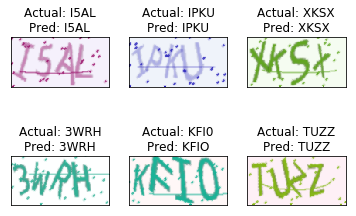

In [3]:
tx, ty = next(capt)

request.inputs['x_ph'].CopyFrom(tf.make_tensor_proto(tx.astype(np.float32), shape=[batch_size, 64, 128, 3]))
request.inputs['y_ph'].CopyFrom(tf.make_tensor_proto(ty, shape=[batch_size, 4]))
response = stub.Predict(request, 20.0)
outputs = response.outputs



[temp_acc] = outputs['acc'].float_val
[temp_acc_] = outputs['acc_'].float_val
temp_preds = np.array(outputs['preds'].int64_val).reshape([-1, 4])
print('acc: %.2f\t' % (temp_acc*100), 'acc_: %.2f\t' % (temp_acc_*100), '\n')


n_rows = 2
n_cols = 3
for i in range(n_cols*n_rows):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(tx[i])
    plt.title('Actual: ' + capt_decode(ty[i]) + '\nPred: ' + capt_decode(temp_preds[i]))
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()